#Regresión lineal

Julián Gil González, PhD.\
Aprendizaje automático y análisis de datos

## Etapa 1: planteamiento del problema.

Suponer que se tiene una nube de $N$ puntos formadas por mediciones de voltaje y corriente
$$
\mathcal{D} = \left\{x_n,y_n\right\}_{n=1}^{N}
$$
$x_n$ representa las medidas de corriente y $y_n$ las medidas de voltaje.

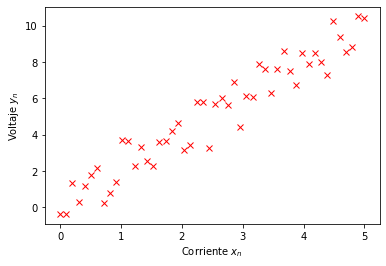

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import optimize

# funcion ideal
def flin(x, a, b):
    return a*x+b

# datos aleatorios para simular las observaciones de voltaje y corriente 
N = 50 # numeros de datos
xdata = np.linspace(0, 5, N)
y = flin(xdata, 2,0)
ydata = y + 0.7 * np.random.randn(len(xdata))
plt.plot(xdata,ydata,'rx')
plt.xlabel(r'Corriente $x_n$')
plt.ylabel(r'Voltaje $y_n$')
plt.show()

## Etapa 2: Hipótesis

Se planetan diferentes hipótesis
$$
f(x) = w_1x
$$

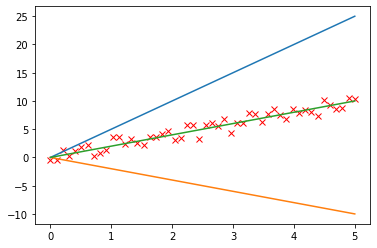

In [2]:
xdata = np.linspace(0, 5, 50)
plt.plot(xdata,ydata,'rx')
plt.plot(xdata,flin(xdata, 5,0)) # 5*x
plt.plot(xdata,flin(xdata, -2,0)) # -2.0*x
plt.plot(xdata,flin(xdata, 2,0)) # 2*x

¿Cómo elegir la mejor aproximación para los datos?

## Etapa 3: función de costo

La función de costo permite evaluar de forma numérica cuál es la mejor aproximación. Para este caso, la función de costo usada es el error cuadrático medio.

$$
L(a) = \frac{1}{N}\sum_{n=1}^{N}(y_n - f(x_n))^2
$$
$$
L(a) = \frac{1}{N}\sum_{n=1}^{N}(y_n - w_1x_n)^2 = \frac{1}{N}\left(\sum_{n=1}^{N}y_n^2 - 2w_1\sum_{n=1}^{N}x_ny_n +w_1^2\sum_{n=1}^{N}x_n^2\right)
$$

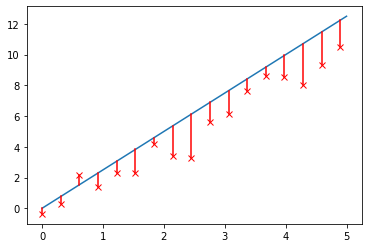

In [3]:
x1 = xdata[::3]
y1 = ydata[::3]
plt.plot(x1,y1,'rx')
plt.plot(xdata,flin(xdata, 2.5,0)) # 2.5*x
for i in range(17):
    plt.plot([x1[i],x1[i]], [y1[i], flin(x1[i], 2.5,0)],'r')

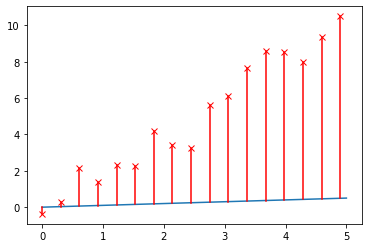

In [4]:
x1 = xdata[::3]
y1 = ydata[::3]
plt.plot(x1,y1,'rx')
plt.plot(xdata,flin(xdata, 0.1,0)) # 0.1*x
for i in range(17):
    plt.plot([x1[i],x1[i]], [y1[i], flin(x1[i], 0.1,0)],'r')

# Etapa 4: Optimización basado en gradiente

La idea ahora es encontrar los valores mínimos de la función de costo. Si analizamos a produndidad la función de costo podemos notar que es cuadrática con respecto al parámetro $a$.
$$
L(a) = \left(\underbrace{\frac{1}{N}\sum_{n=1}^{N}y_n^2}_{\zeta} - 2w_1\underbrace{\frac{1}{N}\sum_{n=1}^{N}x_ny_n}_{\beta} + w_1^2\underbrace{\frac{1}{N}\sum_{n=1}^{N}x_n^2}_{\alpha}\right) = \alpha w_1^2 -2\beta w_1 + \zeta
$$

In [5]:
def loss(parametros):
    N = len(ydata)
    ye = flin(xdata, parametros,0)
    L = (1/N)*np.sum((ydata - ye)**2)
    return L

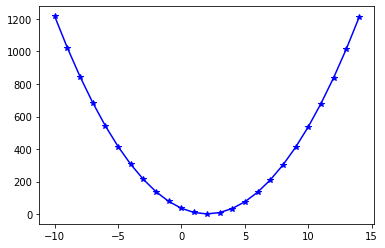

In [6]:
w_1 = np.arange(-10,15,1)
L = np.zeros(len(w_1))
for i in range(len(w_1)):
    L[i] = loss(w_1[i])
plt.plot(w_1,L,'b-*')

Existen muchas técnicas de optimización basado en gradiente. Sin embargo, todos se basan en una solución recursiva para los parámetros
$$
w_1 = w_1 − \eta\nabla \!L,
$$
donde $\eta$ se denomina la razón de aprendizaje (learning rate) y $\nabla \!L$ es el gradiente de la función de costo. 

Es necesario calcular derivadas de la función de costo con respecto a los parámetros.

Se implementa el algoritmo de gradiente descendente

In [7]:
def gradient_descent(gradient, start,learn_rate):
    parametros = []
    parametros.append(start) #se iniciaizan los parámetros
    n_iter = 100
    for i in range(n_iter):
        gr = gradient(parametros[i])
        parametros.append(parametros[i] - learn_rate*gr[0])
        if abs(parametros[i+1]-parametros[i]) < 0.0001:
            break
    return parametros

necesitamos una función que calcule la derivada de la función de costo con respecto a los parámetros
$$
\frac{dL}{dw_1} = \left(\frac{dL}{dw_1}\left\{\frac{1}{N}\sum_{n=1}^{N}y_n^2\right\} - \frac{1}{N}\sum_{n=1}^{N}x_ny_n\frac{dL}{dw_1}\{2w_1\} + \frac{1}{N}\sum_{n=1}^{N}x_n^2\frac{dL}{dw_1}\left\{w_1^2\right\}\right)
$$
$$
\frac{dL}{dw_1} = - \frac{2}{N}\sum_{n=1}^{N}x_ny_n + \frac{2w_1}{N}\sum_{n=1}^{N}x_n^2
$$
$$
\frac{dL}{dw_1} = - \frac{2}{N}\sum_{n=1}^{N}\left[x_ny_n - w_1x_n^2\right]
$$

In [8]:
def gradient(parametros):
    N = len(xdata)
    grad = np.zeros(1)
    grad[0] = -(2/N)*np.sum((xdata*ydata - parametros*xdata**2)) 
    return grad

2.018250941584196


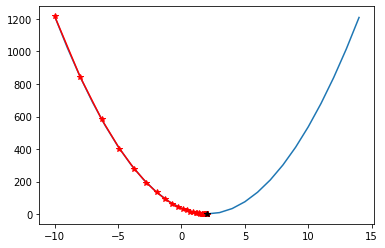

In [9]:
start = -10
learn_rate = 0.01
w_opt = gradient_descent(gradient, start, learn_rate)
L_opt = np.zeros(len(w_opt))
for i in range(len(w_opt)):
    ye = flin(xdata, w_opt[i],0)
    L_opt[i] = loss(w_opt[i])
plt.plot(w_1,L,'-')
plt.plot(w_opt,L_opt,'r-*')
plt.plot(w_opt[-1],L_opt[-1],'k-*')
print(w_opt[-1])

Se grafica la solución

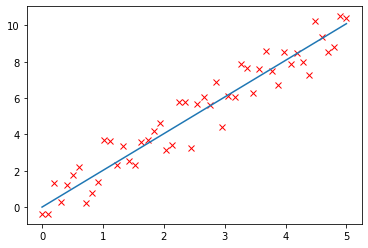

In [10]:
plt.plot(xdata,ydata,'rx')
plt.plot(xdata,flin(xdata, w_opt[-1],0))

El paquete <code>scipy</code> tiene módulos para optimización basada en gradiente.

Primero se verifican que los gradientes estén bien calculados

In [11]:
from scipy.optimize import check_grad
check_grad(loss, gradient, [5]) # el resultado debe ser muy pequeño 

1.5088331224433205e-06

In [12]:
from scipy.optimize import minimize
x0 = -10 #inicialización
res = minimize(loss, x0, method='BFGS', jac=gradient, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.731205
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
[2.01872528]


In [13]:
res = minimize(loss, x0, method='BFGS', options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.731205
         Iterations: 2
         Function evaluations: 8
         Gradient evaluations: 4
[2.01872471]


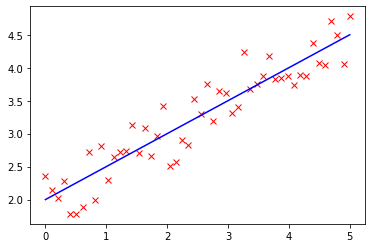

In [14]:
# funcion ideal
def flin(x, a, b):
    return a*x+b

# datos aleatorios para simular las observaciones de voltaje y corriente 
N = 50 # numeros de datos
xdata1 = np.linspace(0, 5, N)
y1 = flin(xdata1, 0.5,2) # pendiente 0.5 e intercepto 2
ydata1 = y1 + 0.3 * np.random.randn(len(xdata1))
plt.plot(xdata1,ydata1,'rx')
plt.plot(xdata1,flin(xdata1, 0.5,2),'b')
plt.show()

En este caso la función de costo depende de dos variables, la pendiente $w_1$ y $w_0$ el intercepto.

$$
f(x_n) = w_1x_n+w_0
$$
$$
L(w_0,w_1) = \frac{1}{N}\sum_{n=1}^{N}(y_n - f(x_n))^2
$$
$$
L(w_0,w_1) = \frac{1}{N}\sum_{n=1}^{N}(y_n - (w_1x_n+w_0))^2 
$$
$$
L(w_0,w_1) = \frac{1}{N}\sum_{n=1}^{N}y_n^2 - \frac{2w_1}{N}\sum_{n=1}^{N}y_nx_n - \frac{2w_0}{N}\sum_{n=1}^{N}y_n + \frac{w_1^2}{N}\sum_{n=1}^{N}x_n^2 + \frac{2w_1w_0}{N}\sum_{n=1}^{N}x_n + w_0^2
$$

En este caso la variable <code>parametros</code> es un vector de dos posiciones uno para $a$ y otro para $b$

In [15]:
def loss1(parametros):
    N = len(ydata1)
    ye = flin(xdata1, parametros[0], parametros[1])
#     ye = flin(xdata1, *parametros)
    L = (1/N)*np.sum((ydata1 - ye)**2)
    return L

$$
\frac{dL}{dw_1} = \frac{dL}{dw_1}\left\{\frac{1}{N}\sum_{n=1}^{N}y_n^2 - \frac{2w_1}{N}\sum_{n=1}^{N}y_nx_n - \frac{2w_0}{N}\sum_{n=1}^{N}y_n + \frac{w_1^2}{N}\sum_{n=1}^{N}x_n^2 + \frac{2w_1w_0}{N}\sum_{n=1}^{N}x_n + w_0^2\right\}
$$
$$
\frac{dL}{dw_0} = - \frac{2}{N}\sum_{n=1}^{N}y_nx_n + \frac{2w_1}{N}\sum_{n=1}^{N}x_n^2 + \frac{2w_0}{N}\sum_{n=1}^{N}x_n
$$
$$
\frac{dL}{dw_1} =  \frac{2}{N}\sum_{n=1}^{N}\left(-y_nx_n + w_1x_n^2 + w_0x_n\right)
$$

$$
\frac{dL}{dw_0} = \frac{dL}{db}\left\{\frac{1}{N}\sum_{n=1}^{N}y_n^2 - \frac{2w_1}{N}\sum_{n=1}^{N}y_nx_n - \frac{2w_0}{N}\sum_{n=1}^{N}y_n + \frac{w_1^2}{N}\sum_{n=1}^{N}x_n^2 + \frac{2w_0w_1}{N}\sum_{n=1}^{N}x_n + w_0^2\right\}
$$
$$
\frac{dL}{dw_0} = - \frac{2}{N}\sum_{n=1}^{N}y_n  + \frac{2w_1}{N}\sum_{n=1}^{N}x_n + 2w_0
$$
$$
\frac{dL}{dw_0} =  \frac{2}{N}\sum_{n=1}^{N}(-y_n  + w_1x_n) + 2w_0
$$

In [16]:
def gradient1(parametros):
    N = len(xdata1)
    grad = np.zeros(len(parametros))
    grad[0] = (2/N)*np.sum((-xdata1*ydata1 + parametros[0]*xdata1**2 + parametros[1]*xdata1)) 
    grad[1] = (2/N)*np.sum((-ydata1 + parametros[0]*xdata1)) + 2*parametros[1]
    return grad

In [17]:
check_grad(loss1, gradient1, [2,4]) # el resultado debe ser muy pequeño mucho menor que

2.033347700048268e-07

In [18]:
x0 = [-10,0]
res = minimize(loss1, x0, method='BFGS', jac=gradient1, options={'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.081365
         Iterations: 5
         Function evaluations: 7
         Gradient evaluations: 7
[0.50134229 1.98638632]


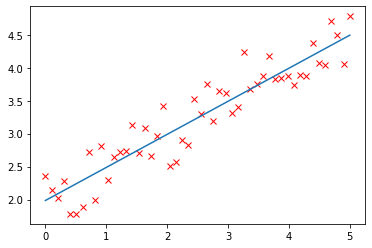

In [19]:
plt.plot(xdata1,ydata1,'rx')
plt.plot(xdata1,flin(xdata1, res.x[0], res.x[1]))